This notebook plots summary plots for some stats on the footprint following the depth+ebv cuts for (translationally) undithered surveys.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pylab
import pickle

In [2]:
fontsize = 16
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['axes.labelsize'] = fontsize
pylab.rcParams['xtick.labelsize'] = fontsize-2
pylab.rcParams['ytick.labelsize'] = fontsize-2
pylab.rcParams['legend.fontsize'] = fontsize
pylab.rcParams['axes.linewidth'] = 2

In [3]:
# want specific ordering of the dbs so write them out
dbs = ['baseline2018a', 'kraken_2026', 'kraken_2035', 'kraken_2036', 'colossus_2665', \
          'colossus_2664', 'colossus_2667', 'pontus_2002', 'pontus_2489', 'pontus_2502', 'mothra_2045', \
       'kraken_2042', 'kraken_2044', 'mothra_2049', 'nexus_2097']
# output directory
outDir = '/global/homes/a/awan/desc/depth_data_outputs/comparisons'

# set up for plots
colors = ['m', 'b', 'g', 'k']
shapes = ['o', 'v', 's', 'd']

In [4]:
dicts_all = {}
dicts = {}
# read in undithered data
print('Reading in undithered data')
data_dir = '/global/homes/a/awan/desc/depth_data_outputs/undith'
for dbname in dbs:
    files = [f for f in os.listdir(data_dir) if f.__contains__(dbname) and f.endswith('pickle')]
    # need to separate alt_sched from alt_sched_rolling
    if dbname=='alt_sched':
        files = [f for f in files if not f.__contains__('rolling')]
    if len(files)>1:
        raise ValueError('Have more than one files: %s'%files)
    # consider the files
    for filename in files:
        print('Read in data for %s'%dbname)
        with open('%s/%s'%(data_dir, filename), 'rb') as handle:
            dicts[dbname] = pickle.load(handle)
            
nDbs = len(dicts.keys())
print('%s dbs'%nDbs)
dicts_all['undithered'] = dicts

# read in dithered data
dicts = {}
print('Reading in undithered data')
data_dir = '/global/homes/a/awan/desc/depth_data_outputs'
for dbname in dicts_all['undithered']:
    files = [f for f in os.listdir(data_dir) if f.__contains__(dbname) and f.endswith('pickle')]
    # need to separate alt_sched from alt_sched_rolling
    if dbname=='alt_sched':
        files = [f for f in files if not f.__contains__('rolling')]
    if len(files)>1:
        raise ValueError('Have more than one files: %s'%files)
    # consider the files
    for filename in files:
        print('Read in data for %s'%dbname)
        with open('%s/%s'%(data_dir, filename), 'rb') as handle:
            dicts[dbname] = pickle.load(handle)
            
nDbs = len(dicts.keys())
print('%s dbs'%nDbs)

dicts_all['dithered'] = dicts

Reading in undithered data
Read in data for baseline2018a
Read in data for kraken_2026
Read in data for kraken_2035
Read in data for kraken_2036
Read in data for colossus_2665
Read in data for colossus_2664
Read in data for colossus_2667
Read in data for pontus_2002
Read in data for pontus_2489
Read in data for pontus_2502
Read in data for mothra_2045
Read in data for kraken_2042
Read in data for kraken_2044
Read in data for mothra_2049
Read in data for nexus_2097
15 dbs
Reading in undithered data
Read in data for baseline2018a
Read in data for kraken_2026
Read in data for kraken_2035
Read in data for kraken_2036
Read in data for colossus_2665
Read in data for colossus_2664
Read in data for colossus_2667
Read in data for pontus_2002
Read in data for pontus_2489
Read in data for pontus_2502
Read in data for mothra_2045
Read in data for kraken_2042
Read in data for kraken_2044
Read in data for mothra_2049
Read in data for nexus_2097
15 dbs


**Plot the usable area for different cadences for dithered and undithered data**

Saved compare_area_15dbs_undith.png


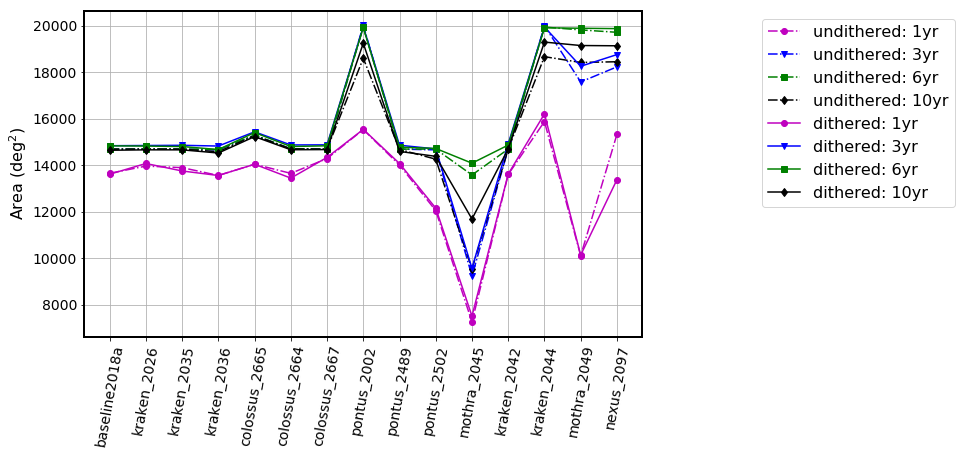

In [11]:
xlabels = []
# first need to create the lists with the data each yr_cut
sty = ['-.', '-']

for sty_ind, dith in enumerate(dicts_all.keys()):
    areas = {}
    dicts = dicts_all[dith]
    for dbname in dicts:  # loop over dbs
        if dbname.__contains__('_rolling_mix_10yrs'):
            label = dbname.split('_rolling_mix_10yrs')[0]
        else:
            label = dbname
        xlabels.append(label)
        for yr_cut in dicts[dbname]['Area (deg$^2$)'].keys():  # loop over yr cuts
            if yr_cut not in areas: areas[yr_cut] = []
            # add this db's area
            areas[yr_cut].append(dicts[dbname]['Area (deg$^2$)'][yr_cut])

    # now plot
    for i, yr_cut in enumerate(areas):
        plt.plot(range(nDbs), areas[yr_cut], '%s%s'%(shapes[i], sty[sty_ind]), color=colors[i], label='%s: %s'%(dith, yr_cut))

# plot details
plt.grid()
plt.legend(bbox_to_anchor=(1.2,1))
plt.ylabel(r'Area (deg$^2$)')
plt.xticks(range(nDbs), xlabels, rotation=80)
filename = 'compare_area_%sdbs_undith.png'%(nDbs)
plt.savefig('%s/%s'%(outDir, filename), format= 'png', bbox_inches='tight')
print('Saved %s'%filename)
plt.show()

**Plot the i-band median depth + std for different cadences for dithered and undithered data**

5$\sigma$ Depth: Median
5$\sigma$ Depth: Median
Saved compare_depth_median_15dbs_undith.png


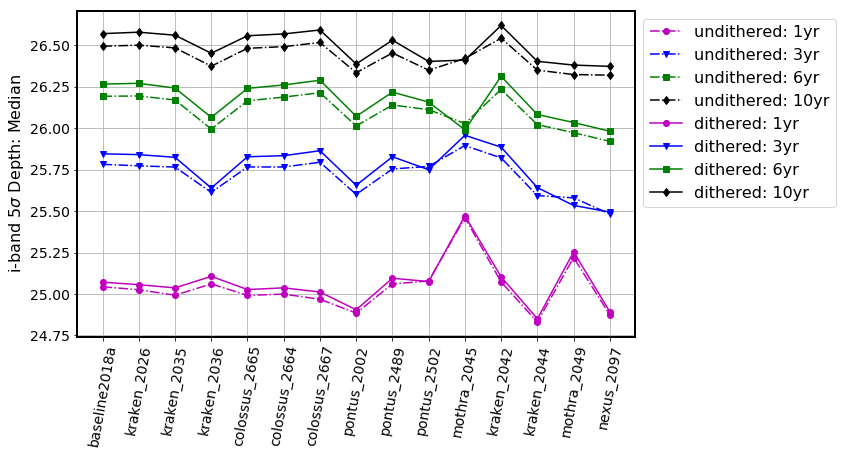

5$\sigma$ Depth: Std
5$\sigma$ Depth: Std
Saved compare_depth_std_15dbs_undith.png


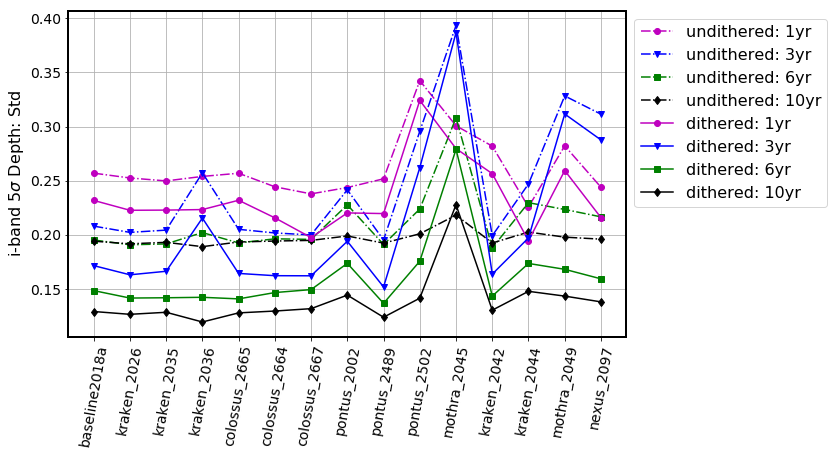

In [12]:
for stat in ['median', 'std']:
    for sty_ind, dith in enumerate(dicts_all.keys()):
        dicts = dicts_all[dith]
        depths = {}
        for band in ['i']:
            depth_stat = {}
            stat_key = [f for f in dicts[dbname].keys() if f.__contains__(stat.capitalize())][0]
            print(stat_key)
            for dbname in dicts: # loop over dbs
                for yr_cut in areas: # loop over yr_cuts
                    if yr_cut not in depth_stat: depth_stat[yr_cut] = []
                    # add this db's depth
                    depth_stat[yr_cut].append(dicts[dbname][stat_key]['%s_%s'%(yr_cut, band)])
            # add vertical markers
            for i, yr_cut in enumerate(areas):
                plt.plot(range(nDbs), depth_stat[yr_cut], '%s%s'%(shapes[i], sty[sty_ind]), color=colors[i], label='%s: %s'%(dith, yr_cut))
    # plot details
    plt.grid()
    plt.legend(bbox_to_anchor=(1.,1))

    plt.ylabel(r'%s-band 5$\sigma$ Depth: %s'%(band, stat.capitalize()))
    plt.xticks(range(nDbs), xlabels, rotation=80)
    filename = 'compare_depth_%s_%sdbs_undith.png'%(stat, nDbs)
    plt.savefig('%s/%s'%(outDir, filename), format= 'png', bbox_inches='tight')
    print('Saved %s'%filename)
    plt.show()

    if stat=='median': # save the median for the summary table plot
        depths = depth_stat